Objective:
    
To use the Global Terrorism Database (GTD) to identify patterns and trends in terrorist attacks worldwide from 1970 to 2017, and to provide insights that can inform counterterrorism efforts.

In [2]:
#Installing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading the file name
data_df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding= 'ISO-8859-1', low_memory=False)

In [4]:
type(data_df)

pandas.core.frame.DataFrame

In [5]:
data_df.shape

(181691, 18)

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [6]:
data_df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [7]:
data_df.tail()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN
181690,2017,12,31,Philippines,Maguindanao,Southeast Asia,Cotabato City,7.209594,124.241966,Bombing/Explosion,0.0,0.0,Unknown,12/31/2017: An explosive device was discovered...,Unknown,Unknown,Explosives,NaN


Data Cleaning

In [8]:
#Checking null values in dataset
data_df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              435
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            638
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [11]:
data_df.dropna(axis=1,how='all')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2.017120e+11,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,2.017120e+11,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,2.017120e+11,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,2.017120e+11,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


Renaming of Columns

In [9]:
data_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [10]:
data_df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [12]:
#Taking the columns which are relevant for analysis
data_df=data_df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [14]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181256 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181053 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

Insights of Data

In [15]:
print("Country with the most attacks:",data_df['Country'].value_counts().idxmax())
print("City with the most attacks:",data_df['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",data_df['Region'].value_counts().idxmax())
print("Year with the most attacks:",data_df['Year'].value_counts().idxmax())
print("Month with the most attacks:",data_df['Month'].value_counts().idxmax())
print("Group with the most attacks:",data_df['Group'].value_counts().index[1])
print("Most Attack Types:",data_df['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


Statistical Summary

In [49]:
data_df['Killed'].sum()

411868.0

411868  innocents who were killed from 1970 to 2017 terrorist attacks.

In [50]:
data_df[["Killed","Wounded"]].describe()

,Killed,Wounded
count,171378.000000,165380.000000
mean,2.403272,3.167668
std,11.545741,35.949392
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,2.000000
max,1570.000000,8191.000000


Data Visualisation

No. of Terrorist attack each year

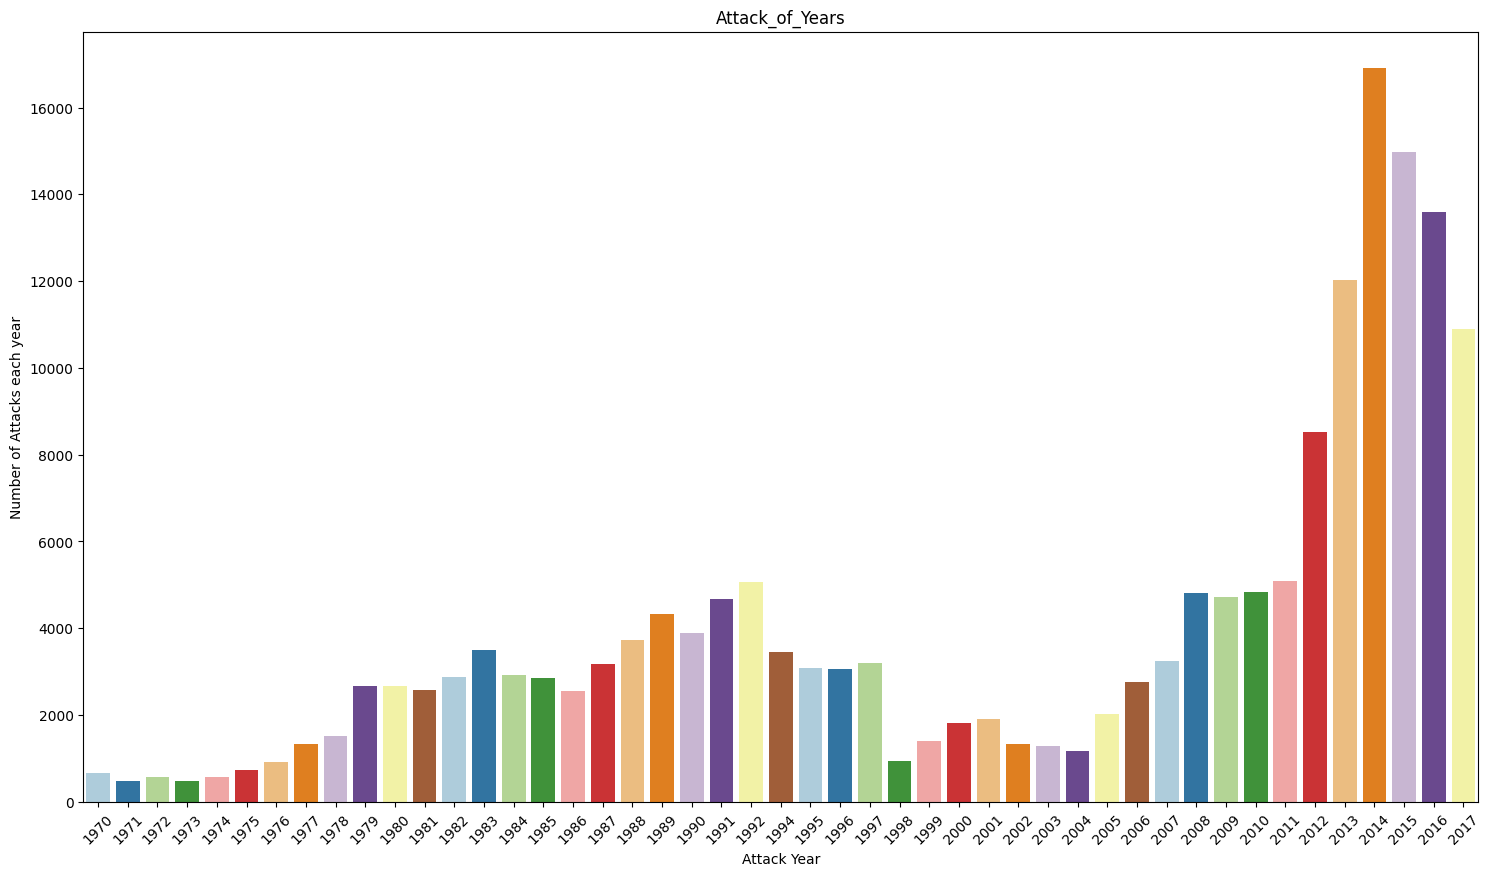

In [55]:
x_year = data_df['Year'].unique()
y_count_years = data_df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = "Paired")
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

1. Highest no. of terrorist activites were taken place in 2014 followed by 2015
2. Whereas as 2016 was the top third year in no. of attacks each year.
3. Eventhough measures and actions are taken by government as well as people terrorist activities are increasing year by year.

Terrorist Activities by Region in each Year through Area Plot

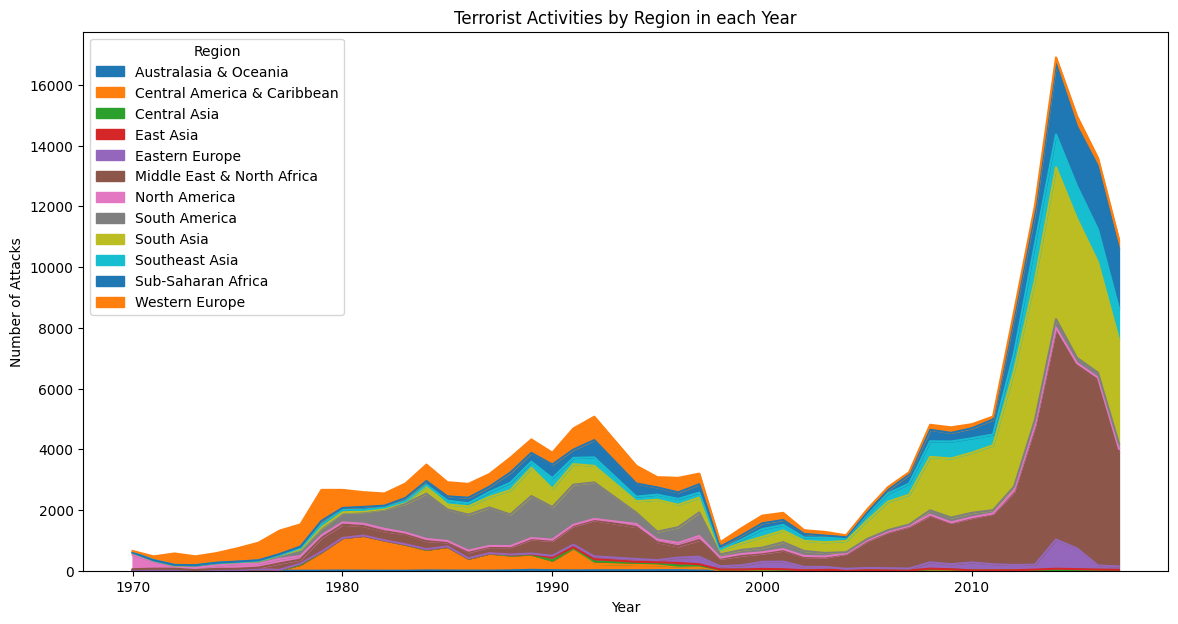

In [26]:
pd.crosstab(data_df.Year, data_df.Region).plot(kind='area',figsize=(14,7))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

Top Countries affected by Terror Attacks

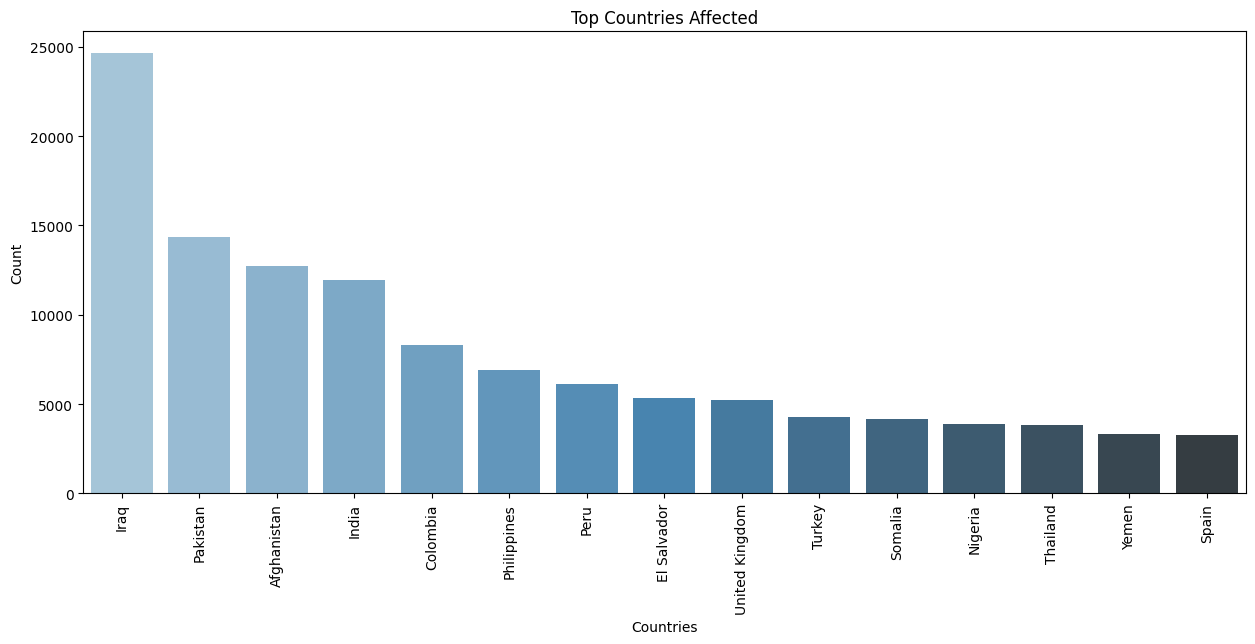

In [27]:
plt.subplots(figsize=(15,6))
sns.barplot(data_df['Country'].value_counts()[:15].index,data_df['Country'].value_counts()[:15].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

 Iraq was the topmost country affected by Terrorist attack


Attacking Methods used by Terrorists

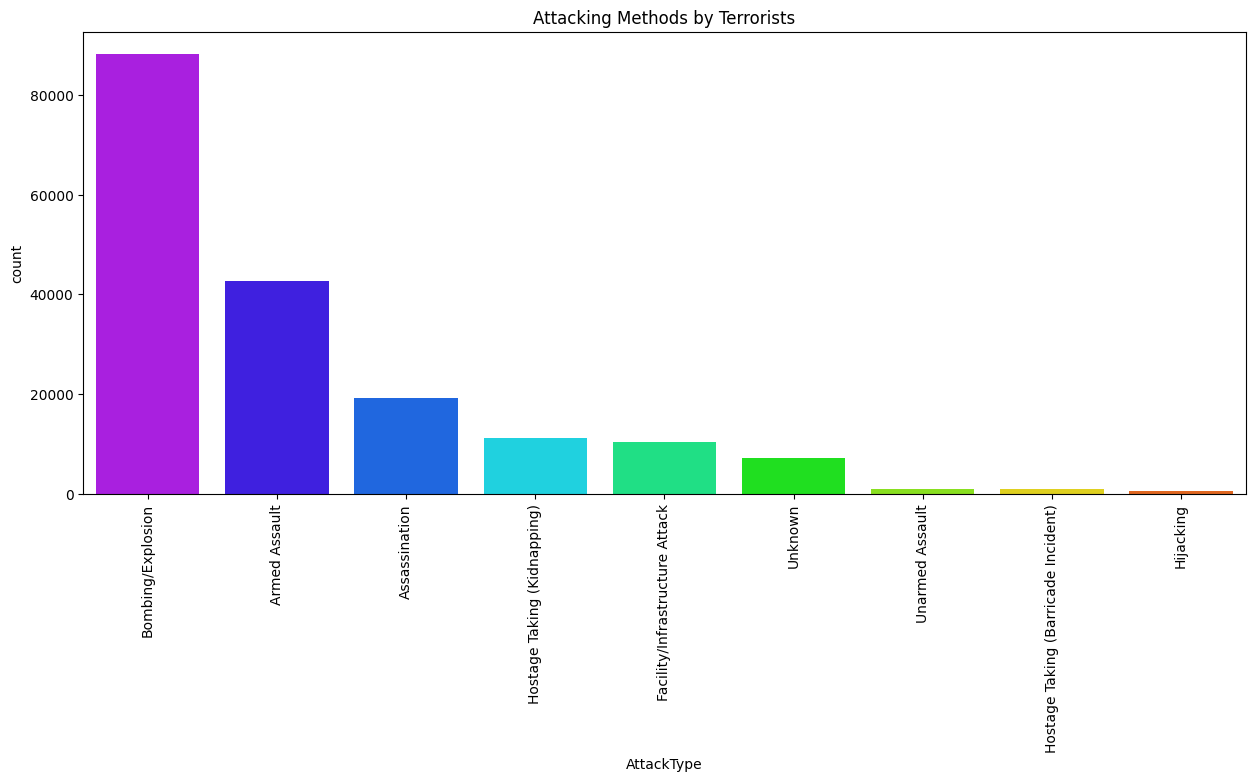

In [33]:
plt.subplots(figsize=(15,6))
sns.countplot("AttackType",data=data_df,palette="gist_rainbow_r",order=data_df["AttackType"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Attacking Methods by Terrorists")
plt.show()

Bombing and Explosion is the most used attacking method. It has caused maximum harm and loss to people

Favourite Targets

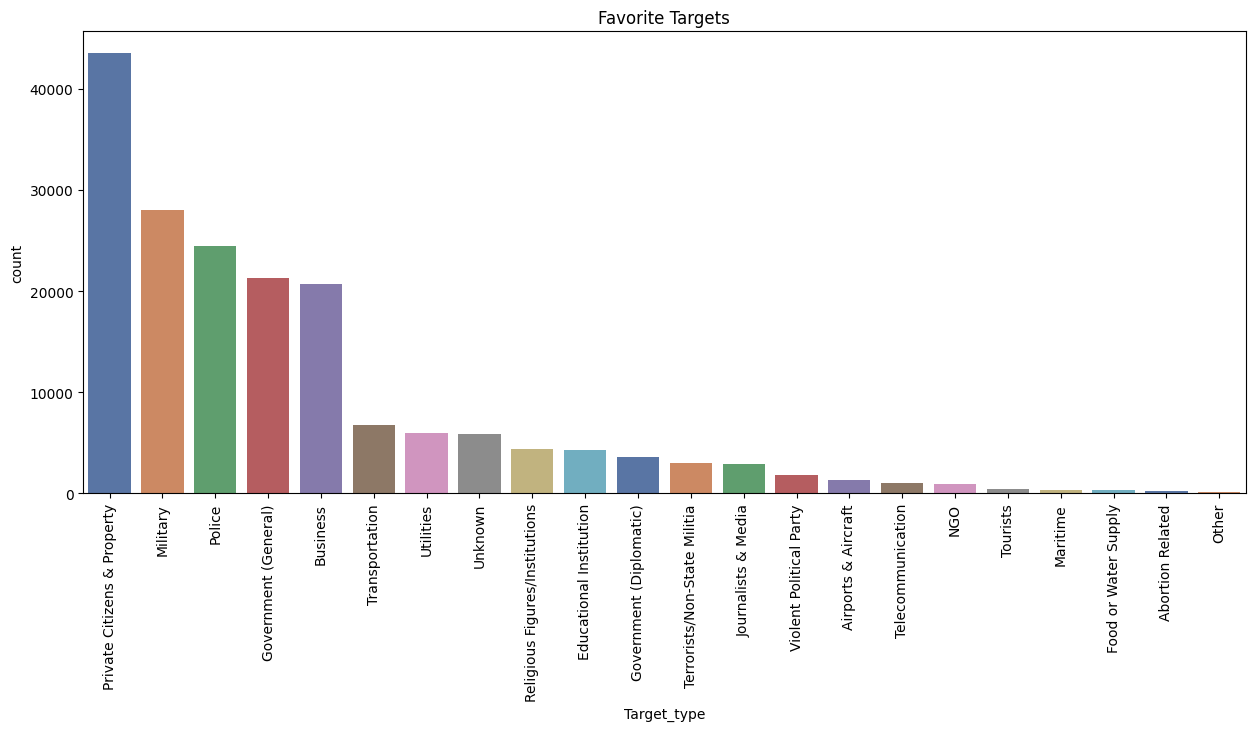

In [56]:
plt.subplots(figsize=(15,6))
sns.countplot(data_df["Target_type"],palette="deep",order =data_df["Target_type"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Favorite Targets")
plt.show()

Private Citizens and Property are the top target of these people.
Whereas as Military is the top most 2nd target 

What are the Hot Zones for Terrorists ?

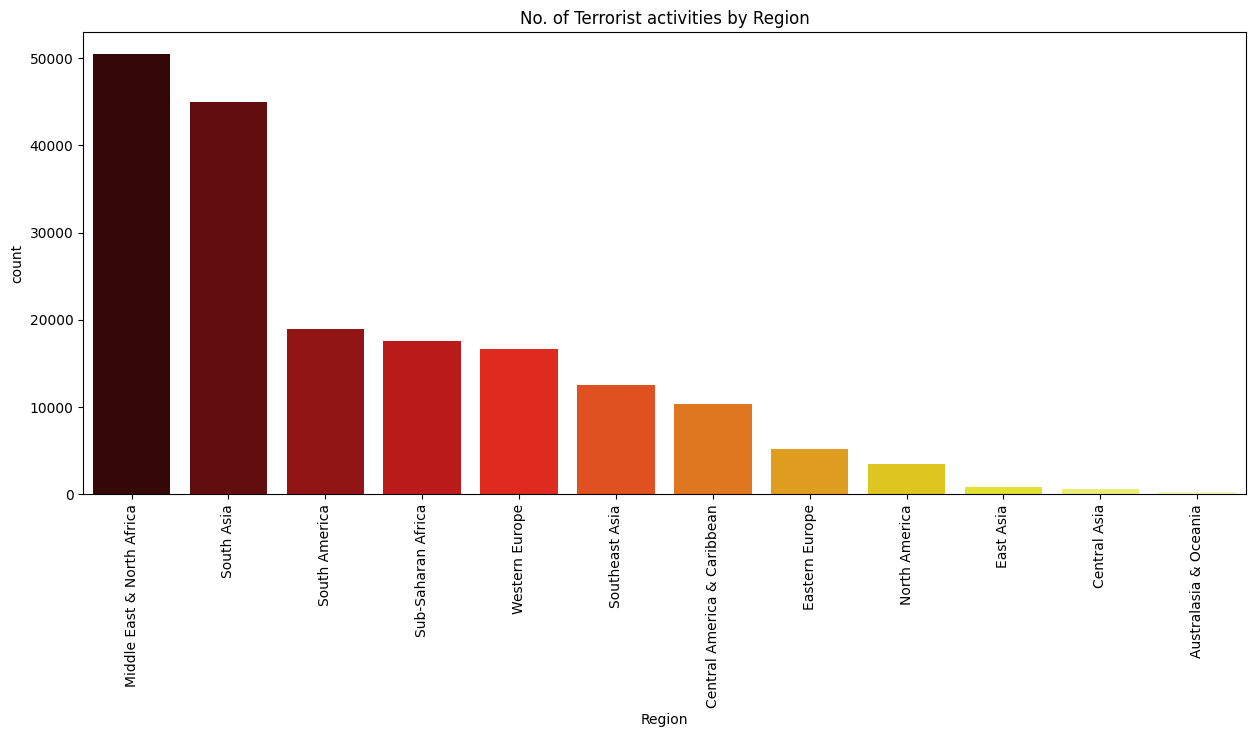

In [38]:
plt.subplots(figsize=(15,6))
sns.countplot(data_df["Region"],palette="hot",order =data_df["Region"].value_counts().index)
plt.xticks(rotation=90)
plt.title("No. of Terrorist activities by Region")
plt.show()

Hot zones areas are Middle East and North Africa. South Asia ranks next.

Attacks Vs No. of people killed

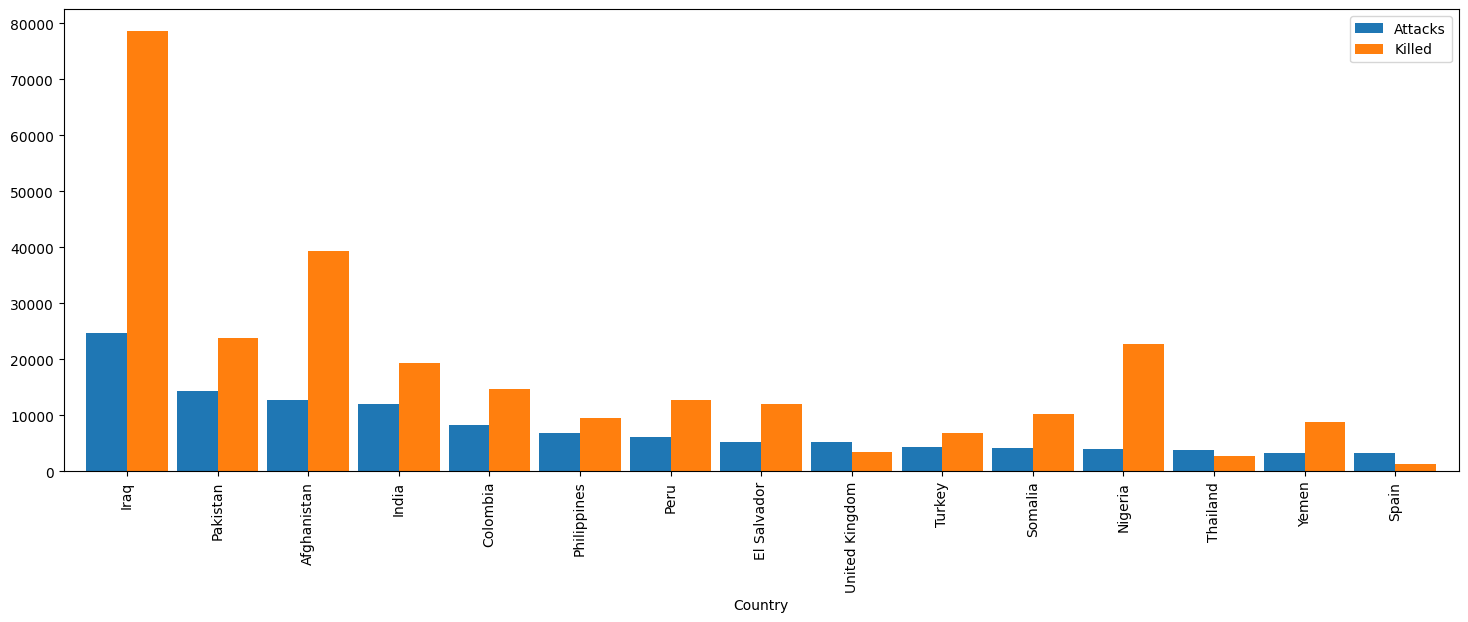

In [44]:
count= data_df["Country"].value_counts()[:15].to_frame()
count.columns=["Attacks"]
count1=data_df.groupby("Country")["Killed"].sum().to_frame()
count.merge(count1,left_index=True,right_index=True,how="left").plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

Iraq has the highest no of attacks as well as highest no. of people are killes in Iraq.

Insights Found:

1.Number of attacks have increased from 1970 to 2017 by 94.0%

2.Country Iraq is found to be highly targetted and has the most attacks also no. of killed people is high in the Iraq and hence is considered as the hot zone of terrorism.

3.The Middle East and North Africa regions are most taregeted ones.

4.Bombing/Explosion is the most frequent method of attack by terrorists.

5.Most no of terrorist activities have taken place in Middle East and North Africa.

In [24]:
# Export the cleaned data
data_df.to_csv('globalterrorismdb_0718dist.csv',index=False)